In [5]:
import numpy as np
import io
import pandas as pd

In [6]:
data = pd.read_csv('ex1data2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Площадь        47 non-null     int64
 1   Кол-во спален  47 non-null     int64
 2   Стоимость      47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [7]:
data

,Площадь,Кол-во спален,Стоимость
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900
5,1534,3,314900
6,1427,3,198999
7,1380,3,212000
8,1494,3,242500
9,1940,4,239999


In [8]:
import matplotlib.pyplot as plt

In [9]:
X1 = np.array(data["Площадь"])
X1

array([1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940, 2000,
       1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888, 1604,
       1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040, 3137,
       1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,  852,
       1852, 1203, 2104], dtype=int64)

In [10]:
Y = np.array(data["Стоимость"])
Y

array([329900, 369000, 232000, 539900, 299900, 314900, 198999, 212000,
       242500, 239999, 347000, 329999, 699900, 259900, 449900, 299900,
       199900, 499998, 599000, 252900, 255000, 242900, 259900, 573900,
       249900, 464500, 469000, 475000, 299900, 349900, 169900, 314900,
       579900, 285900, 249900, 229900, 345000, 549000, 287000, 368500,
       329900, 314000, 299000, 179900, 299900, 239500, 399900],
      dtype=int64)

Text(0, 0.5, 'Стоимость в $')

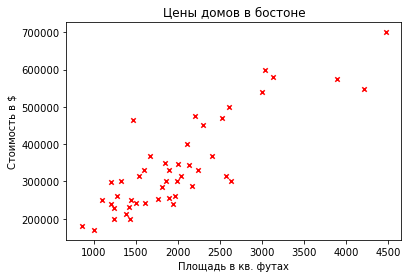

In [11]:
_,ax = plt.subplots()
ax.scatter(X1, Y, color = "r", s = 20, marker='x')

ax.set_title("Цены домов в бостоне")
ax.set_xlabel("Площадь в кв. футах")
ax.set_ylabel("Стоимость в $")

Самой простой моделью будет в данном случае линейная модель $y=kx+b$

In [12]:
max_x = X1.max()
max_y = Y.max()
print(max_x,max_y)

4478 699900


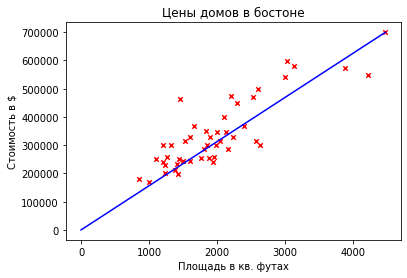

In [11]:
x_line = [0, max_x]
y_line = [0, max_y]

_,ax = plt.subplots()
ax.scatter(X1, Y, color = "r", s = 20, marker='x')

ax.set_title("Цены домов в бостоне")
ax.set_xlabel("Площадь в кв. футах")
ax.set_ylabel("Стоимость в $")
ax.plot(x_line, y_line, color = "b")

## Функция стоимости

Цель линейной регрессии подобрать наилучшим образом прямую ($h_{ϴ_{0},ϴ_{1}}(x) = ϴ_{0} + ϴ_{1} * x$), описывающую наши данные


$ϴ_{0}, ϴ_{1}$ - параметры модели

Нашей целью является подбор этих параметров

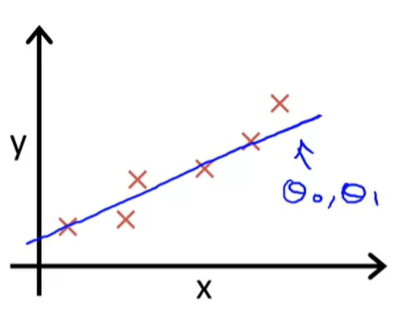

$minimaze_{ϴ_{0},ϴ_{1}}(h_{ϴ}(x) - y(x)) ^ 2$

Нам надо минимизировать квадрат разницы между функциями гипотезы и фактической ценой дома

Но по факту, нам надо минимизировать квадрат разницы не между одной строчкой цены и площади, а суммы всех разниц

$J(ϴ_{0},ϴ_{1}) = \frac{1}{2m}∑_{i=1}^m (h_{ϴ}(x^i) - y(x^i)) ^ 2$ -Средняя квадратичный ошибка (функция стоимости). Эту функцию мы должны минимизировать.


$m$ - кол-во примеров для обучения

Для начала, для простоты воспользуемся упрощенной функцией

Функцией гипотезы будет $h_{ϴ}(x) = ϴ_{0} * x$ 

$ ϴ_{1}=0$

То есть задача сводится к минимизации $J(ϴ_{0})$

Считаем функцию затрат $J$ на каждом примере

theta0 -  150


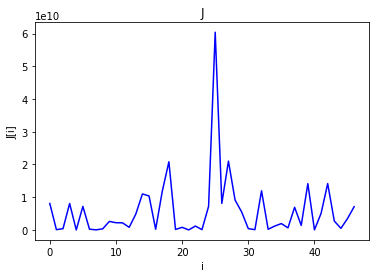

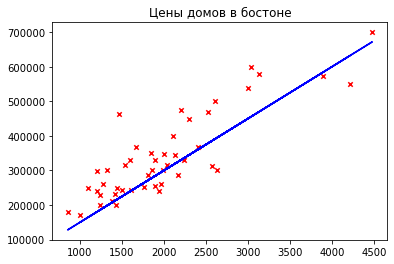

In [14]:
#theta0 = np.random.random() # Возьмем изначальный коэфициент за рандомный
theta0 =150
print("theta0 - ",theta0)

h = np.zeros(47)
J = np.zeros(47)

for i in range(47):
  h[i] = theta0 * X1[i]
  J[i] = (h[i] - Y[i])**2


_,ax = plt.subplots()
ax.set_title("J")
ax.set_xlabel("i")
ax.set_ylabel("J[i]")
ax.plot(np.arange(47), J, color = "b")

_,dx = plt.subplots()
dx.scatter(X1, Y, color = "r", s = 20, marker='x')
dx.set_title("Цены домов в бостоне")
dx.plot(X1, h, color = "b")

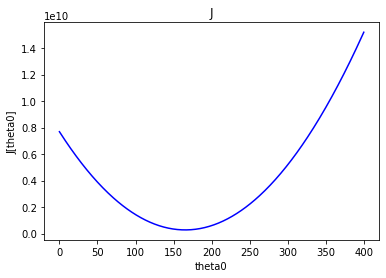

In [15]:
count = 401

theta0 = np.zeros(count)
theta0
for i in range(count):
  theta0[i]=i

h = np.zeros(47)
J_i = np.zeros(47)

J = np.zeros(count)

for j in range(count):
  for i in range(47):
    h[i] = theta0[j] * X1[i]
    J_i[i] = (h[i] - Y[i])**2
  J[j] =  J_i.sum() * (1/(2*count))


_,ax = plt.subplots()
ax.set_title("J")
ax.set_xlabel("theta0")
ax.set_ylabel("J[theta0]")
ax.plot(theta0, J, color = "b")

Примерно в районе $theta0=155$ -  $J$ минимально

Когда мы будем использовать два параметра, то график функции затрат будет выглядеть примерно следуйщим образом: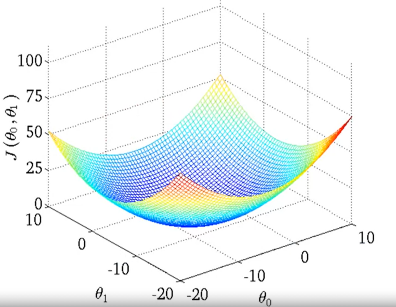

## Градиентный спуск

Градиентный спуск применяется для минимизации функции стоимости J
Он применяется не только для линейной регрессии, он часто испульзуется в различных алгоритмах машинного обучения, включая нейронные сети

$ϴ_{j} := ϴ_{j} - α * \frac{\partial}{\partial ϴ_{j}} * J_{ϴ_{0},ϴ_{1}}$  - мы будем повторять этот шаг, пока не минимизируем нашу функцию затрат


$α$ - коэффициент обучения

$\frac{\partial}{\partial ϴ_{j}}$ - частная производная

$ J_{ϴ_{0},ϴ_{1}}$ - функция затрат

Также надо избегать локальных минимумов

# Теперь решаем задачу:

In [17]:
X = np.array(data['Площадь'])
X

array([1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940, 2000,
       1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888, 1604,
       1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040, 3137,
       1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,  852,
       1852, 1203, 2104], dtype=int64)

In [18]:
Y = np.array(data['Стоимость'])
Y

array([329900, 369000, 232000, 539900, 299900, 314900, 198999, 212000,
       242500, 239999, 347000, 329999, 699900, 259900, 449900, 299900,
       199900, 499998, 599000, 252900, 255000, 242900, 259900, 573900,
       249900, 464500, 469000, 475000, 299900, 349900, 169900, 314900,
       579900, 285900, 249900, 229900, 345000, 549000, 287000, 368500,
       329900, 314000, 299000, 179900, 299900, 239500, 399900],
      dtype=int64)

# Стандартизируем данные

In [19]:
x_max =X.max()
X = X / x_max
X

array([0.35730237, 0.53595355, 0.31621259, 0.66994194, 0.44327825,
       0.34256364, 0.31866905, 0.30817329, 0.33363109, 0.43322912,
       0.44662796, 0.42206342, 1.        , 0.28316213, 0.51362215,
       0.29477445, 0.27601608, 0.58262617, 0.67686467, 0.3945958 ,
       0.42161679, 0.35819562, 0.43814203, 0.86869138, 0.24564538,
       0.32559178, 0.56409111, 0.49129075, 0.58887896, 0.41067441,
       0.22331398, 0.45556052, 0.70053595, 0.40442162, 0.32090219,
       0.27668602, 0.4761054 , 0.94126842, 0.48280482, 0.37159446,
       0.49977669, 0.57324699, 0.26797678, 0.19026351, 0.41357749,
       0.26864672, 0.46985261])

In [20]:
y_max =Y.max()
Y = Y / y_max
Y

array([0.47135305, 0.52721817, 0.33147593, 0.77139591, 0.42848978,
       0.44992142, 0.2843249 , 0.30290041, 0.34647807, 0.3429047 ,
       0.49578511, 0.4714945 , 1.        , 0.37133876, 0.64280612,
       0.42848978, 0.28561223, 0.71438491, 0.85583655, 0.36133733,
       0.36433776, 0.34704958, 0.37133876, 0.81997428, 0.35705101,
       0.66366624, 0.67009573, 0.67866838, 0.42848978, 0.49992856,
       0.24274896, 0.44992142, 0.82854694, 0.40848693, 0.35705101,
       0.3284755 , 0.49292756, 0.78439777, 0.41005858, 0.52650379,
       0.47135305, 0.44863552, 0.42720389, 0.25703672, 0.42848978,
       0.34219174, 0.57136734])

In [25]:
def computeCost(X, y, theta): # функция стоимости
  m = len(y)
  J = 0
  h = X * theta[1] + theta[0]
  squaredErrors = (h - y) ** 2
  J = (1 / (2 * m)) * squaredErrors.sum()
  return J

In [26]:
def gradientDescent(X, y, theta, alpha, num_iters): #градиентный спуск (парный градиентный спуск)
  m = len(y)
  J_history = np.zeros((num_iters, 1))
  min_theta = np.zeros((2, 1))
  minJ=1000000000 

  for iter in range(num_iters): #Обучение
    h = X * theta[1] + theta[0]

    theta[0] -= alpha * (1 / m) * ((h - y)).sum()
    theta[1] -= alpha * (1 / m) * ((h - y)* X).sum()




    cost = computeCost(X, y, theta)
    J_history[iter] = cost
    print(f"{iter} epochs: {cost}")

    if cost<minJ: #Запись минимального тета
      minJ=cost
      min_theta = theta




  _,ax = plt.subplots()#Вывод истории ошибок
  ax.set_title("J")
  ax.set_xlabel("theta")
  ax.set_ylabel("J")
  ax.plot(np.arange(len(J_history)), J_history, color = "b")
  return min_theta

In [27]:
iterations = 10000 #Кол-во эпох обучения
alpha = 0.0001 #Коэффициент обучения
theta = np.array([[0.25],[1.5]],dtype=float) #Изначальные веса
theta

array([[0.25],
       [1.5 ]])

0 epochs: 0.1045670099070755
1 epochs: 0.10454363998913059
2 epochs: 0.10452027569814717
3 epochs: 0.10449691703276937
4 epochs: 0.10447356399164169
5 epochs: 0.10445021657340903
6 epochs: 0.10442687477671646
7 epochs: 0.1044035386002094
8 epochs: 0.10438020804253378
9 epochs: 0.10435688310233575
10 epochs: 0.10433356377826163
11 epochs: 0.10431025006895824
12 epochs: 0.10428694197307269
13 epochs: 0.10426363948925248
14 epochs: 0.10424034261614533
15 epochs: 0.10421705135239931
16 epochs: 0.10419376569666286
17 epochs: 0.10417048564758469
18 epochs: 0.10414721120381387
19 epochs: 0.10412394236399979
20 epochs: 0.10410067912679212
21 epochs: 0.10407742149084104
22 epochs: 0.10405416945479677
23 epochs: 0.10403092301730998
24 epochs: 0.10400768217703181
25 epochs: 0.10398444693261355
26 epochs: 0.1039612172827068
27 epochs: 0.10393799322596362
28 epochs: 0.10391477476103637
29 epochs: 0.10389156188657754
30 epochs: 0.10386835460124023
31 epochs: 0.10384515290367774
32 epochs: 0.10382195

2770 epochs: 0.05731838706967115
2771 epochs: 0.05730639054512124
2772 epochs: 0.057294396907102405
2773 epochs: 0.057282406154919016
2774 epochs: 0.05727041828787583
2775 epochs: 0.05725843330527768
2776 epochs: 0.057246451206429495
2777 epochs: 0.05723447199063648
2778 epochs: 0.05722249565720397
2779 epochs: 0.057210522205437465
2780 epochs: 0.057198551634642616
2781 epochs: 0.057186583944125256
2782 epochs: 0.05717461913319138
2783 epochs: 0.057162657201147195
2784 epochs: 0.057150698147298985
2785 epochs: 0.05713874197095331
2786 epochs: 0.057126788671416774
2787 epochs: 0.057114838247996236
2788 epochs: 0.05710289069999872
2789 epochs: 0.05709094602673137
2790 epochs: 0.05707900422750156
2791 epochs: 0.05706706530161678
2792 epochs: 0.05705512924838468
2793 epochs: 0.057043196067113076
2794 epochs: 0.05703126575711004
2795 epochs: 0.0570193383176837
2796 epochs: 0.057007413748142395
2797 epochs: 0.056995492047794666
2798 epochs: 0.056983573215949136
2799 epochs: 0.056971657251914

5362 epochs: 0.034178873146408155
5363 epochs: 0.03417244165924475
5364 epochs: 0.03416601171773651
5365 epochs: 0.03415958332151099
5366 epochs: 0.03415315647019589
5367 epochs: 0.034146731163418965
5368 epochs: 0.03414030740080806
5369 epochs: 0.03413388518199112
5370 epochs: 0.03412746450659619
5371 epochs: 0.0341210453742514
5372 epochs: 0.034114627784584954
5373 epochs: 0.03410821173722516
5374 epochs: 0.0341017972318004
5375 epochs: 0.034095384267939156
5376 epochs: 0.03408897284527001
5377 epochs: 0.0340825629634216
5378 epochs: 0.034076154622022695
5379 epochs: 0.03406974782070216
5380 epochs: 0.034063342559088876
5381 epochs: 0.03405693883681189
5382 epochs: 0.03405053665350032
5383 epochs: 0.03404413600878333
5384 epochs: 0.03403773690229024
5385 epochs: 0.03403133933365039
5386 epochs: 0.034024943302493296
5387 epochs: 0.03401854880844847
5388 epochs: 0.034012155851145566
5389 epochs: 0.03400576443021432
5390 epochs: 0.033999374545284566
5391 epochs: 0.0339929861959862
5392 

8269 epochs: 0.020721100635385667
8270 epochs: 0.020717900191469702
8271 epochs: 0.02071470051472897
8272 epochs: 0.020711501604978654
8273 epochs: 0.020708303462033943
8274 epochs: 0.020705106085710082
8275 epochs: 0.02070190947582238
8276 epochs: 0.02069871363218619
8277 epochs: 0.020695518554616876
8278 epochs: 0.020692324242929896
8279 epochs: 0.0206891306969407
8280 epochs: 0.020685937916464812
8281 epochs: 0.020682745901317832
8282 epochs: 0.020679554651315334
8283 epochs: 0.020676364166272984
8284 epochs: 0.020673174446006474
8285 epochs: 0.02066998549033157
8286 epochs: 0.020666797299064014
8287 epochs: 0.020663609872019695
8288 epochs: 0.020660423209014445
8289 epochs: 0.020657237309864202
8290 epochs: 0.020654052174384926
8291 epochs: 0.020650867802392617
8292 epochs: 0.02064768419370335
8293 epochs: 0.02064450134813322
8294 epochs: 0.020641319265498358
8295 epochs: 0.02063813794561495
8296 epochs: 0.020634957388299246
8297 epochs: 0.02063177759336749
8298 epochs: 0.020628598

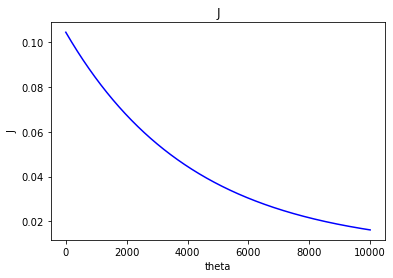

In [28]:
theta = gradientDescent(X, Y, theta, alpha, iterations)# обучение

In [30]:
theta

array([[1.17320637e-04],
       [1.37099390e+00]])

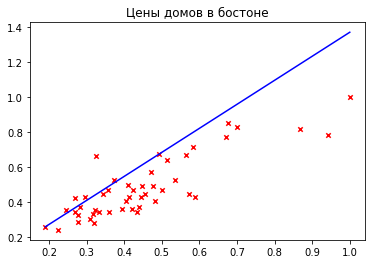

In [31]:
lisX = np.array([X.min(),X.max()])
lisY = lisX * theta[1] + theta[0] 



_,dx = plt.subplots()
dx.scatter(X, Y, color = "r", s = 20, marker='x')
dx.set_title("Цены домов в бостоне")
dx.plot(lisX, lisY, color = "b")

In [32]:
print(f"Реальная цена: {Y[0]*y_max}\nПредсказание: {(X[0]*theta[1]+theta[0])*y_max}")

Реальная цена: 329900.0
Предсказание: [342934.68210279]
